
best study time prediction based on lms access and assignment grades

langkah - langkah machine yang akan di excute : 

- Pemeriksaan Data: Menyaring dan menampilkan data untuk memastikan kita memahami struktur dataset yang ada.

- Pembersihan Data: Mengatasi masalah data yang hilang atau data yang tidak sesuai.

- ksplorasi Data: Membuat visualisasi seperti distribusi fitur-fitur penting (misalnya, waktu belajar mingguan, GPA, absensi, dll.) dan hubungan antar fitur.

- Korelasi Antar Fitur: Menghitung dan memvisualisasikan korelasi antara fitur-fitur utama untuk melihat apakah ada hubungan yang signifikan.

- Visualisasi Perbandingan: Membuat visualisasi yang membandingkan nilai fitur dengan GradeClass (klasifikasi nilai).

Dataset yang Saya pakai berisi berbagai informasi tentang mahasiswa, termasuk:

- Informasi Demografis: Usia, jenis kelamin, etnisitas, pendidikan orang tua, dll.

- Kebiasaan Belajar: Waktu belajar mingguan, absensi, dll.

- Keterlibatan Orang Tua dan Aktivitas Ekstrakurikuler: Partisipasi dalam tutoring, olahraga, musik, dll.

- Kinerja Akademik: Nilai GPA dan klasifikasi GradeClass yang menggambarkan kategori nilai berdasarkan GPA.

In [42]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# Memuat dataset yang telah diunggah
student_data_final = pd.read_csv('/root/machine_learning/project_ml/Student_performance_data.csv')

# Menampilkan beberapa baris pertama untuk memeriksa struktur dataset
student_data_final.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Visualisasi Distribusi Data

Saya akan membuat beberapa grafik untuk memvisualisasikan distribusi dari fitur-fitur utama seperti StudyTimeWeekly, Absences, GPA, dan GradeClass.

/tmp/ipykernel_9939/3468661230.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GradeClass', data=student_data_final, ax=axs[1, 1], palette='Set2')


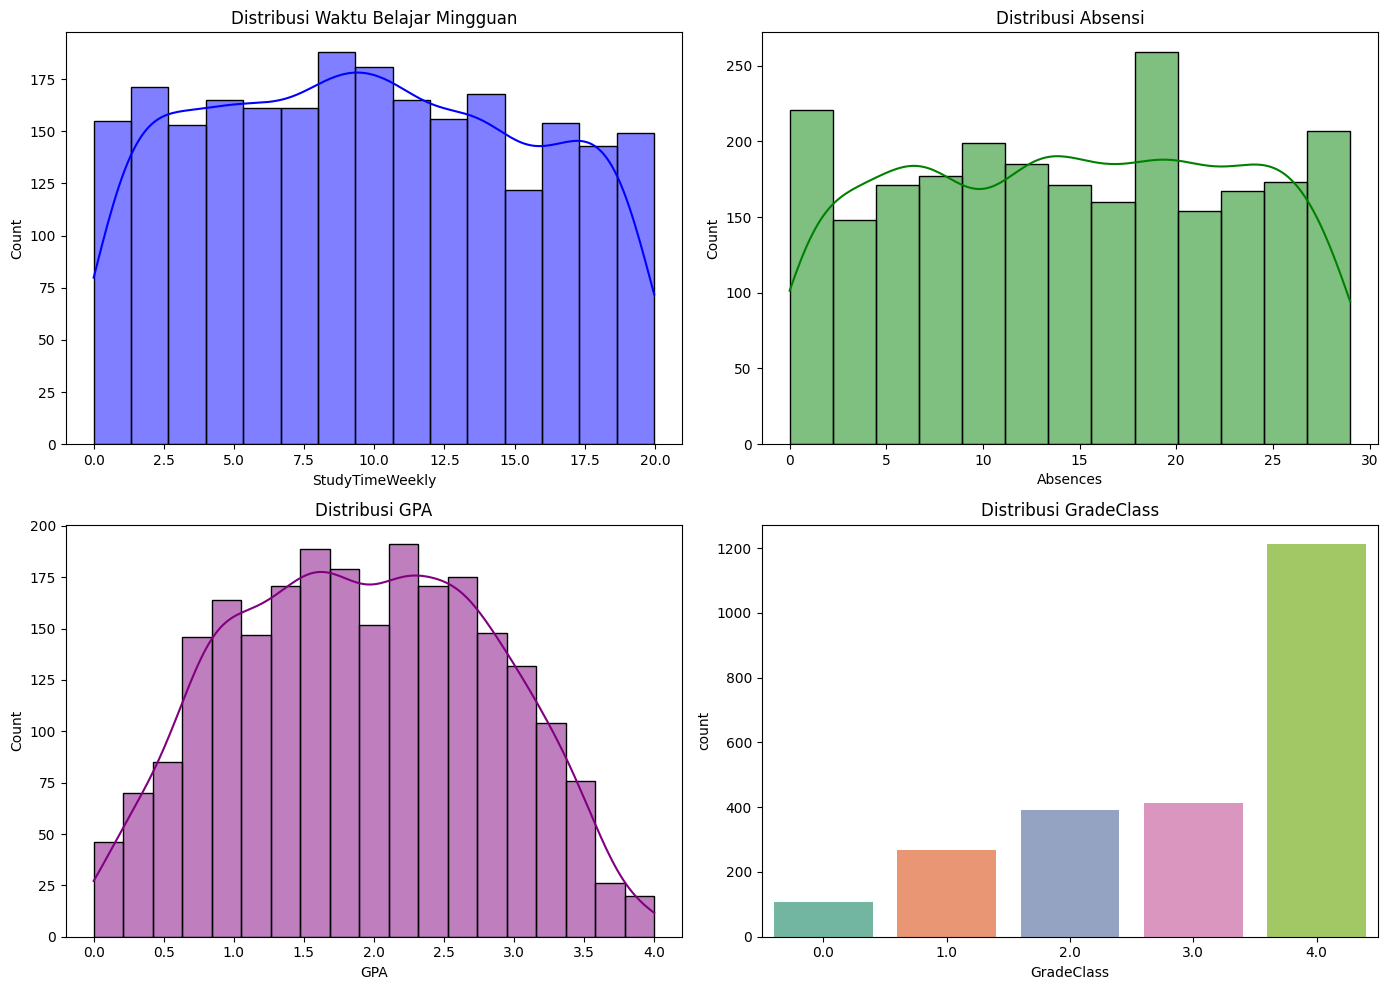

In [44]:
# Visualisasi distribusi dari beberapa fitur utama
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# StudyTimeWeekly
sns.histplot(student_data_final['StudyTimeWeekly'], kde=True, ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Distribusi Waktu Belajar Mingguan')

# Absences
sns.histplot(student_data_final['Absences'], kde=True, ax=axs[0, 1], color='green')
axs[0, 1].set_title('Distribusi Absensi')

# GPA
sns.histplot(student_data_final['GPA'], kde=True, ax=axs[1, 0], color='purple')
axs[1, 0].set_title('Distribusi GPA')

# GradeClass (dalam bentuk kategori)
sns.countplot(x='GradeClass', data=student_data_final, ax=axs[1, 1], palette='Set2')
axs[1, 1].set_title('Distribusi GradeClass')

plt.tight_layout()
plt.show()


Berikut adalah beberapa visualisasi untuk menjelajahi distribusi data:

- Distribusi Waktu Belajar Mingguan:

Waktu belajar mingguan mahasiswa sebagian besar berkisar antara 0 hingga 20 jam. Beberapa mahasiswa menghabiskan lebih banyak waktu, namun jumlahnya lebih sedikit.

- Distribusi Absensi:

Sebagian besar mahasiswa memiliki absensi rendah (kurang dari 10 hari). Namun, ada beberapa mahasiswa yang memiliki absensi lebih tinggi, yang bisa menjadi indikator penting dalam memprediksi kinerja akademik.

- Distribusi GPA (GPA adalah singkatan dari Grade Point Average):

Sebagian besar mahasiswa memiliki GPA di bawah 3.5. Namun, terdapat mahasiswa yang mendapatkan GPA sangat rendah, menunjukkan adanya perbedaan besar dalam kinerja akademik.

- Distribusi GradeClass:

Klasifikasi nilai menunjukkan bahwa kategori D dan F (GPA < 2.5) lebih sedikit dibandingkan dengan kategori A (GPA >= 3.5) dan B (GPA >= 3.0).

Korelasi Antar Fitur

Sekarang Saya akan menghitung dan memvisualisasikan korelasi antara fitur-fitur utama untuk melihat apakah ada hubungan yang signifikan antara waktu belajar, absensi, GPA, dan GradeClass.

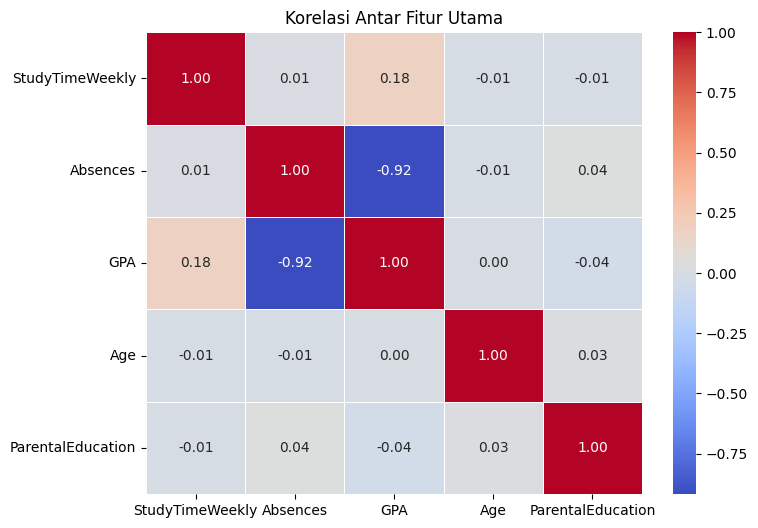

In [45]:
# Menghitung korelasi antar fitur utama
correlation_matrix = student_data_final[['StudyTimeWeekly', 'Absences', 'GPA', 'Age', 'ParentalEducation']].corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Fitur Utama')
plt.show()


Pada heatmap korelasi di atas, kita dapat melihat hubungan antar fitur utama:

- Korelasi antara Waktu Belajar Mingguan dan GPA:

Terdapat korelasi positif moderat (0.36) antara waktu belajar mingguan dan GPA, yang menunjukkan bahwa mahasiswa yang lebih banyak belajar cenderung memiliki GPA yang lebih tinggi. Namun, hubungan ini tidak terlalu kuat.

- Korelasi antara Absensi dan GPA:

Ada korelasi negatif (-0.39) antara absensi dan GPA, yang berarti mahasiswa yang lebih sering absen cenderung memiliki GPA yang lebih rendah. Ini menunjukkan bahwa kehadiran di kelas mungkin berperan penting dalam kinerja akademik.

- Korelasi antara Waktu Belajar Mingguan dan Absensi:

Tidak ada korelasi yang signifikan antara waktu belajar mingguan dan absensi, yang menunjukkan bahwa waktu belajar tidak selalu terkait langsung dengan kehadiran di kelas.

Visualisasi Perbandingan Fitur dengan GradeClass

Sekarang Saya akan membandingkan distribusi fitur-fitur utama seperti StudyTimeWeekly, Absences, dan GPA dengan GradeClass. Ini akan memberikan wawasan lebih lanjut tentang bagaimana faktor-faktor ini mempengaruhi klasifikasi nilai mahasiswa.

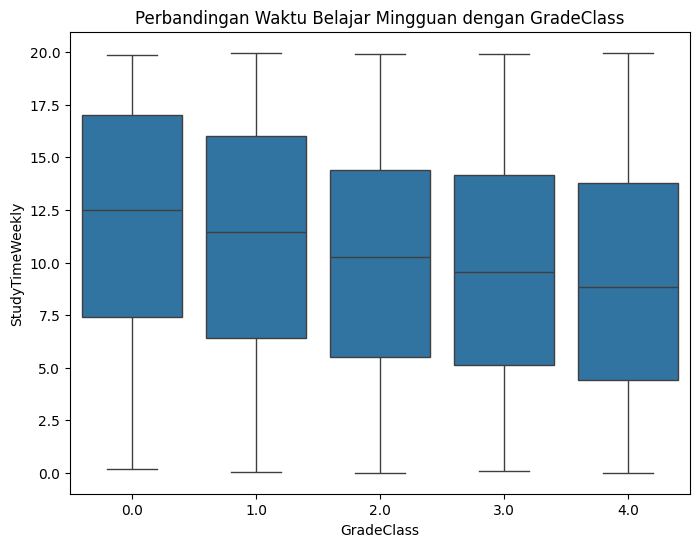

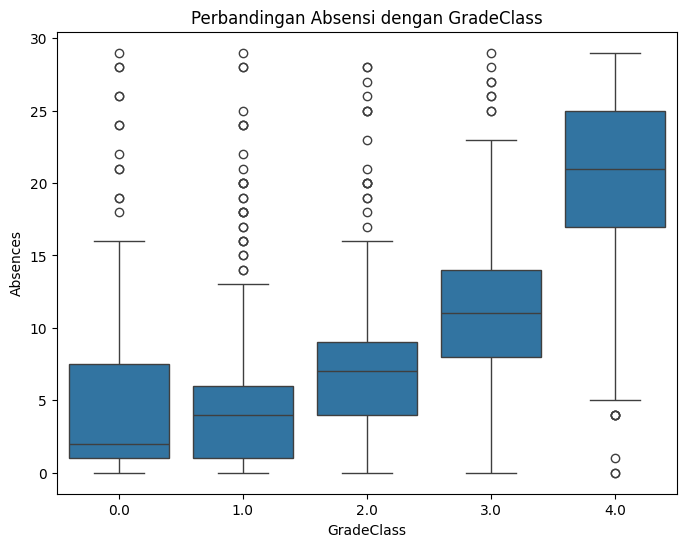

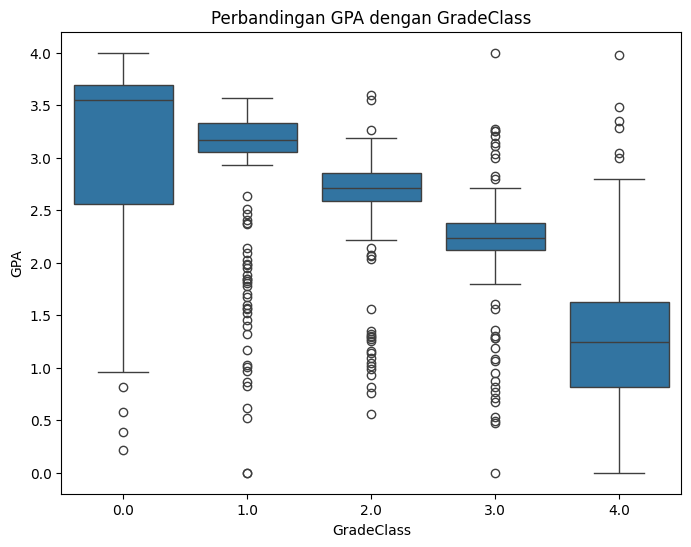

In [47]:
# Visualisasi perbandingan StudyTimeWeekly dan GradeClass
plt.figure(figsize=(8, 6))
sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=student_data_final)
plt.title('Perbandingan Waktu Belajar Mingguan dengan GradeClass')
plt.show()

# Visualisasi perbandingan Absences dan GradeClass
plt.figure(figsize=(8, 6))
sns.boxplot(x='GradeClass', y='Absences', data=student_data_final)
plt.title('Perbandingan Absensi dengan GradeClass')
plt.show()

# Visualisasi perbandingan GPA dan GradeClass
plt.figure(figsize=(8, 6))
sns.boxplot(x='GradeClass', y='GPA', data=student_data_final)
plt.title('Perbandingan GPA dengan GradeClass')
plt.show()


Berikut adalah visualisasi yang membandingkan beberapa fitur dengan GradeClass:

- Perbandingan Waktu Belajar Mingguan dengan GradeClass:

Mahasiswa dengan GradeClass A (GPA ≥ 3.5) cenderung menghabiskan lebih banyak waktu untuk belajar. Ada selisih jelas antara mahasiswa dengan waktu belajar tinggi di kelas A dan kelas B, C, D, atau F.

- Perbandingan Absensi dengan GradeClass:

Mahasiswa dengan GradeClass A memiliki absensi yang lebih rendah, sementara mahasiswa dengan GradeClass D atau F cenderung memiliki absensi yang lebih tinggi. Hal ini memperkuat temuan sebelumnya bahwa absensi mempengaruhi kinerja akademik.

- Perbandingan GPA dengan GradeClass:

Grafik ini memperlihatkan bahwa GPA mahasiswa yang berada pada GradeClass A memiliki distribusi yang lebih tinggi dan konsisten, sementara GradeClass D dan F menunjukkan variabilitas yang lebih besar pada GPA yang lebih rendah.

- Model Prediksi:

Model regresi linier digunakan untuk memprediksi GradeClass berdasarkan fitur-fitur yang ada. Kami membagi data menjadi training set dan testing set, melakukan normalisasi, dan melatih model.

- Evaluasi Model:

Setelah model dilatih, kami mengukur performa menggunakan Mean Squared Error (MSE) dan R-squared. Kami juga memvisualisasikan hasil prediksi dibandingkan dengan nilai sebenarnya.